## Mid Term Test - Text Based Analysis
## Text Analytics, Social Media Scrapping
### Vineeth Anumula


#### Data Collection from the web
Data can be collected using APIs, typically for social media 

Data can be “Scrapped” from any website (using scrapy andRegularexpressions

## Authentication

In [31]:
!pip install praw

Note: you may need to restart the kernel to use updated packages.


In [32]:
import praw

user_agent = "Reddit_Scrapper 1.0 by /u/FeatureChoice5036"
reddit = praw.Reddit(
    client_id="0Tf4xnylq6T_ODVfxQ4PGQ",
    client_secret="Y8aJ9S10hjSP58PiHAl15hJqI16j3g",
    user_agent=user_agent
)

In [33]:
import pandas as pd
import numpy as np
import re #RegEx : Regular expression

## Get Trending Topic from your Subreddit

The **"Tweets"** subreddit channel will be use for this project

In [35]:
# Hot new rising topics

headlines = set()
for submission in reddit.subreddit("tweets").hot(limit=None):
    print(submission.title)#Subreddit Title
    print(submission.id) #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break
    headlines.add(submission.title)
print(len(headlines))

Places you can still do the equivalent of tweet without Twitter/X? It needs to be trashed and let Elon pay for the dumpster fire.
184k3oa
in1984
1701030895.0
1
1.0
https://www.reddit.com/r/tweets/comments/184k3oa/places_you_can_still_do_the_equivalent_of_tweet/
0


**Get total comment in Subreddit**

In [168]:
headlines = set()
for submission in reddit.subreddit("tweets").hot(limit=None):
    headlines.add(submission.title)
print(len(headlines))

433


## Creating Tweets Dataframe

In [170]:
df = pd.DataFrame(headlines)
df.head()

,0
0,"Ma'am, I am sorry but what?"
1,ESPN cleanup going into extra innings
2,"Mrs. Betty Bowers: ""You know what will always ..."
3,Seems like we are giving 1986 another go ⏳🔮🌎 (...
4,@jasonsamfield: I find it a bit disconcerting ...


## Displaying Rows of a Dataframe

In [174]:
#df = df.iloc[:, 1:]
# Display the first few rows of the Cancer DataFrame
df.head()

,0
0,"Ma'am, I am sorry but what?"
1,ESPN cleanup going into extra innings
2,"Mrs. Betty Bowers: ""You know what will always ..."
3,Seems like we are giving 1986 another go ⏳🔮🌎 (...
4,@jasonsamfield: I find it a bit disconcerting ...


## Displaying the columns

In [177]:
# Display the column names of the Cancer DataFrame
df.columns

RangeIndex(start=0, stop=1, step=1)

## Renaming the column of the Tweets Dataframe

In [180]:
# Renaming the column of the Cancer DataFrame to 'Titles' and displaying the first few rows
df.columns = ['Titles']
df.head()

,Titles
0,"Ma'am, I am sorry but what?"
1,ESPN cleanup going into extra innings
2,"Mrs. Betty Bowers: ""You know what will always ..."
3,Seems like we are giving 1986 another go ⏳🔮🌎 (...
4,@jasonsamfield: I find it a bit disconcerting ...


## Datatypes of the Tweets dataset

In [183]:
# df.dtypes returns data types of the data frame
df.dtypes

Titles    object
dtype: object

## Display information

In [186]:
#df.info returns concise summary of a DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433 entries, 0 to 432
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Titles  433 non-null    object
dtypes: object(1)
memory usage: 3.5+ KB


## Display Descriptive

In [189]:
#The df.describe() method in pandas is used to generate descriptive statistics of the central tendency, dispersion, and shape of a DataFrame's distribution, excluding NaN values
df.describe()

,Titles
count,433
unique,433
top,"Ma'am, I am sorry but what?"
freq,1


## Adding a new column to the dataframe 

In [192]:
#Let’s add a new column with the length of the “text” column
#df['text']: Selects the 'text' column from the DataFrame.
#.str.len(): Applies the len() function to each element in the 'text' column, returning the length of each string.
#df['length'] = ...: Creates a new column named 'length' in the DataFrame and assigns the calculated lengths to this column

df['length'] = df['Titles'].str.len()
df.describe()

,length
count,433.000000
mean,58.637413
std,52.810503
min,1.000000
25%,16.000000
50%,39.000000
75%,95.000000
max,294.000000


## Display Dataframe Information

In [195]:
#The df.describe(include='O') output will show statistics for each object (string) column in your DataFrame.
df.describe(include='O')

,Titles
count,433
unique,433
top,"Ma'am, I am sorry but what?"
freq,1


## Checking for duplicate titles in the Tweets DataFrame

In [198]:
df.Titles.duplicated().sum() 

0

## Finding a missing values of Dataframe

In [201]:
#df.isna().sum() output will show the count of missing values for each column in your DataFrame.
df.isna().sum()

Titles    0
length    0
dtype: int64

## Changing Titles to Uppercase

In [204]:
#df['Titles'] = df['Titles'].str.upper(): Converts the values in the 'Titles' column to uppercase.


df['Titles'] = df['Titles'].str.upper()
print (df)

                                                Titles  length
0                          MA'AM, I AM SORRY BUT WHAT?      27
1                ESPN CLEANUP GOING INTO EXTRA INNINGS      37
2    MRS. BETTY BOWERS: "YOU KNOW WHAT WILL ALWAYS ...     270
3    SEEMS LIKE WE ARE GIVING 1986 ANOTHER GO ⏳🔮🌎 (...      67
4    @JASONSAMFIELD: I FIND IT A BIT DISCONCERTING ...     156
..                                                 ...     ...
428                                WHAT A COMRADE MAN.      19
429                             FAILING CAREER AND ALL      22
430                                          BAD MUSIC       9
431  SHAKIRA AGAINST PIQUÉ IN HER LAST SONG: "YOU T...     147
432                                              SCION       5

[433 rows x 2 columns]


## Cleaning the text

In [207]:
#Clean the text

#Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r'#', '', text) #Remove the '#' symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
    text = re.sub(r':', '', text) # Remove :
    
    return text

#Cleaning the text
df["Titles"]= df["Titles"].apply(cleanTxt)

#Show the clean text
df.head()

,Titles,length
0,"MA'AM, I AM SORRY BUT WHAT?",27
1,ESPN CLEANUP GOING INTO EXTRA INNINGS,37
2,"MRS. BETTY BOWERS ""YOU KNOW WHAT WILL ALWAYS B...",270
3,SEEMS LIKE WE ARE GIVING 1986 ANOTHER GO ⏳🔮🌎 (...,67
4,I FIND IT A BIT DISCONCERTING THAT A COMPANY ...,156


## Removing Emoji and Unique 

In [210]:
#Next we have to remove emoji & Unicode from the reddit data.
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

#Cleaning the text
df["Titles"]= df["Titles"].apply(remove_emoji)

#Show the clean text
df.head()

,Titles,length
0,"MA'AM, I AM SORRY BUT WHAT?",27
1,ESPN CLEANUP GOING INTO EXTRA INNINGS,37
2,"MRS. BETTY BOWERS ""YOU KNOW WHAT WILL ALWAYS B...",270
3,SEEMS LIKE WE ARE GIVING 1986 ANOTHER GO ⏳ (CR...,67
4,I FIND IT A BIT DISCONCERTING THAT A COMPANY ...,156


### Plotting charts

Text(0.5, 1.0, 'Line Plot of Length Column')

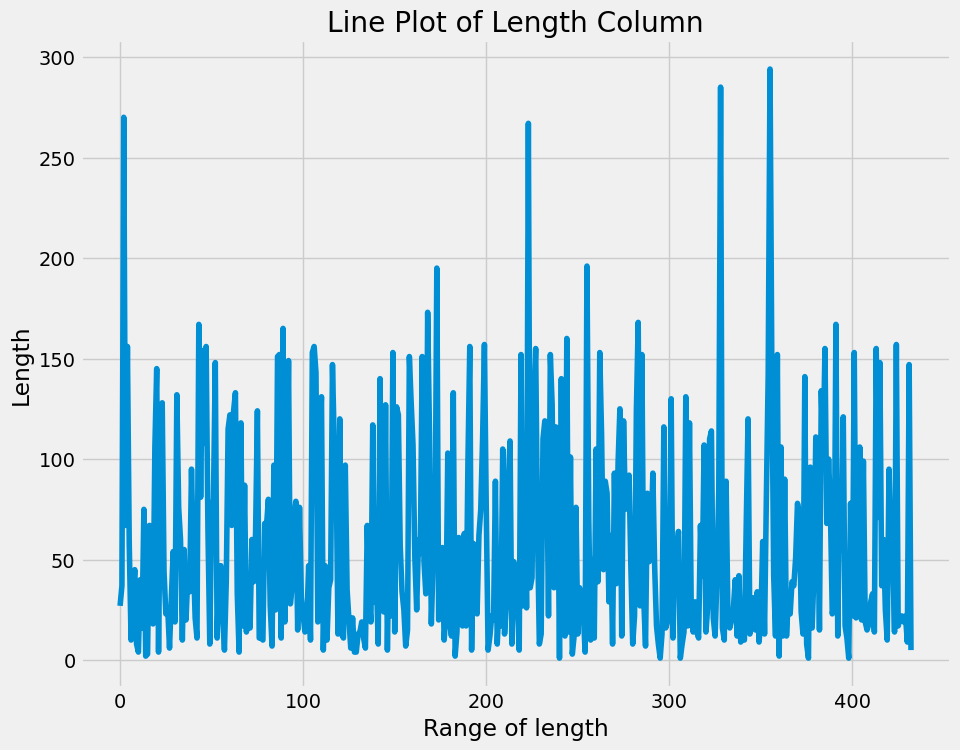

In [213]:
#df['length'].plot(): This creates a line plot for the 'length' column. The x-axis will likely represent the index of the DataFrame, and the y-axis will represent the values in the 'length' column.
#df['length'].plot(kind='box', vert=False): This creates a horizontal box plot for the 'length' column. Box plots provide a visual summary of the distribution of data, including the median, quartiles, and potential outliers.

#!pip install matplotlib

import matplotlib.pyplot as plt
df['length'].plot()
plt.xlabel('Range of length') 
plt.ylabel('Length')
plt.title('Line Plot of Length Column') 

### Boxplot

Text(0.5, 1.0, 'Box Plot of Length Column')

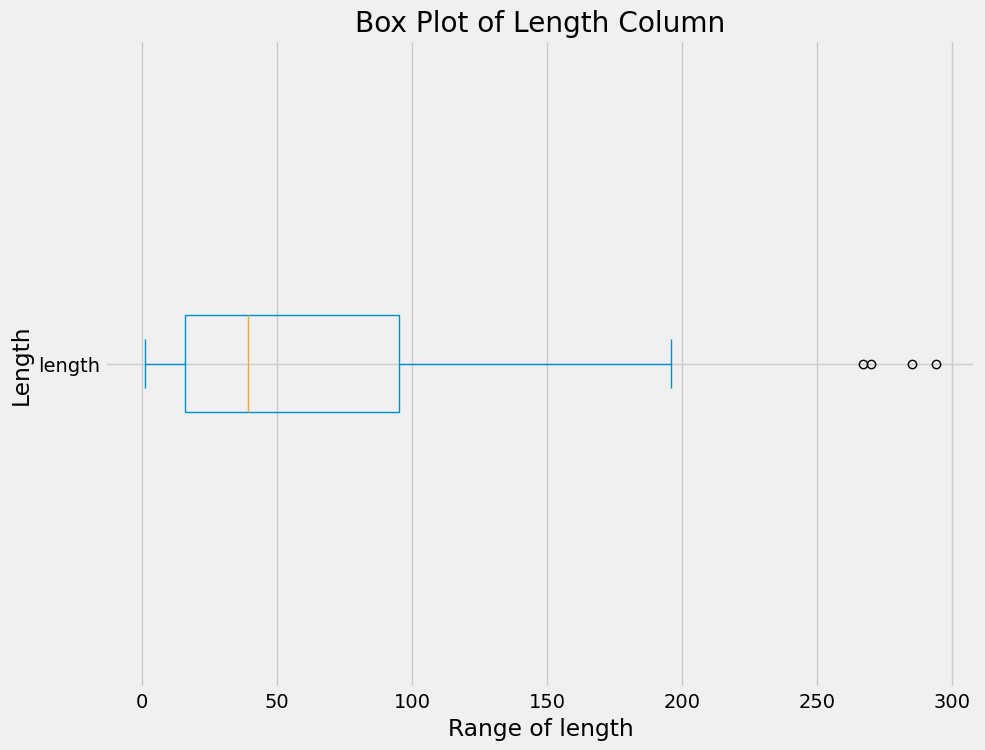

In [216]:
df['length'].plot(kind='box', vert=False)
plt.xlabel('Range of length')
plt.ylabel('Length') 
plt.title('Box Plot of Length Column') 

### Histogram

Text(0.5, 1.0, 'Histogram of Length Column')

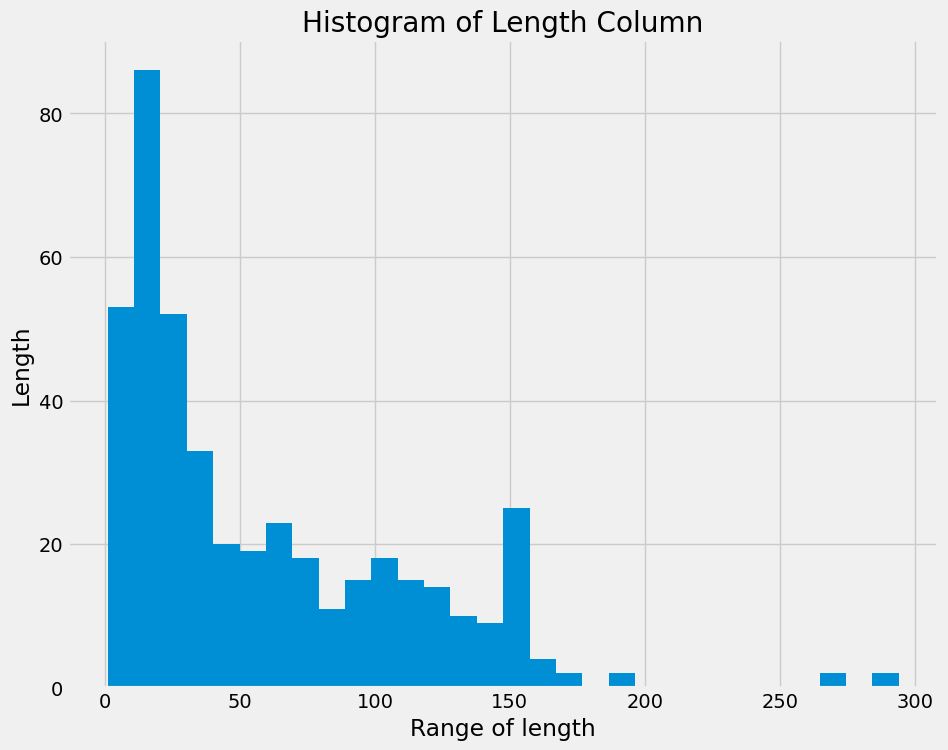

In [219]:
#df['length'].plot(kind='hist', bins=30): This creates a histogram for the 'length' column with 30 bins. The x-axis represents the range of 'length' values, and the y-axis represents the frequency or count of values within each bin.

df['length'].plot(kind='hist', bins=30)
plt.xlabel('Range of length')  
plt.ylabel('Length')  
plt.title('Histogram of Length Column') 

### REGEX TO PULL OUT WORDS

In [222]:
#!pip install regex
import regex as re
import pandas as pd

def tokenize(Titles):
    return re.findall(r'[\w-]*[a-zA-Z][\w-]*', Titles)


df['tokenized_Titles'] = df['Titles'].apply(lambda x: tokenize(str(x)))

# Display the DataFrame with the tokenized titles
print(df[['Titles', 'tokenized_Titles']].head())

                                              Titles  \
0                        MA'AM, I AM SORRY BUT WHAT?   
1              ESPN CLEANUP GOING INTO EXTRA INNINGS   
2  MRS. BETTY BOWERS "YOU KNOW WHAT WILL ALWAYS B...   
3  SEEMS LIKE WE ARE GIVING 1986 ANOTHER GO ⏳ (CR...   
4   I FIND IT A BIT DISCONCERTING THAT A COMPANY ...   

                                    tokenized_Titles  
0                  [MA, AM, I, AM, SORRY, BUT, WHAT]  
1       [ESPN, CLEANUP, GOING, INTO, EXTRA, INNINGS]  
2  [MRS, BETTY, BOWERS, YOU, KNOW, WHAT, WILL, AL...  
3  [SEEMS, LIKE, WE, ARE, GIVING, ANOTHER, GO, CR...  
4  [I, FIND, IT, A, BIT, DISCONCERTING, THAT, A, ...  


## Remove Stop words

In [225]:
import nltk

# Download the necessary NLTK resources
#nltk.download('punkt')

from nltk.tokenize import word_tokenize

# Download English stopwords
nltk.download('stopwords')

# Define the remove_stop function
def remove_stop(tokens):
    stopwords = set(nltk.corpus.stopwords.words('english'))
    return [t for t in tokens if t.lower() not in stopwords]



# Tokenize and remove stop words
df['clean_tokens'] = df['Titles'].apply(lambda x: remove_stop(word_tokenize(str(x))))

# Display the DataFrame with the cleaned tokens
print(df[['Titles', 'clean_tokens']].tail())


                                                Titles  \
428                                WHAT A COMRADE MAN.   
429                             FAILING CAREER AND ALL   
430                                          BAD MUSIC   
431  SHAKIRA AGAINST PIQUÉ IN HER LAST SONG "YOU TR...   
432                                              SCION   

                                          clean_tokens  
428                                  [COMRADE, MAN, .]  
429                                  [FAILING, CAREER]  
430                                       [BAD, MUSIC]  
431  [SHAKIRA, PIQUÉ, LAST, SONG, ``, TRADED, FERRA...  
432                                            [SCION]  


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nikhilapodila/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Function to tokenize

In [228]:
import regex as re
import pandas as pd

def tokenize(Titles):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', Titles)
    
df['tokenized_Titles'] = df['Titles'].apply(lambda x: tokenize(str(x)))

# Display the DataFrame with the tokenized titles
print(df[['Titles', 'tokenized_Titles']].head())

                                              Titles  \
0                        MA'AM, I AM SORRY BUT WHAT?   
1              ESPN CLEANUP GOING INTO EXTRA INNINGS   
2  MRS. BETTY BOWERS "YOU KNOW WHAT WILL ALWAYS B...   
3  SEEMS LIKE WE ARE GIVING 1986 ANOTHER GO ⏳ (CR...   
4   I FIND IT A BIT DISCONCERTING THAT A COMPANY ...   

                                    tokenized_Titles  
0                  [MA, AM, I, AM, SORRY, BUT, WHAT]  
1       [ESPN, CLEANUP, GOING, INTO, EXTRA, INNINGS]  
2  [MRS, BETTY, BOWERS, YOU, KNOW, WHAT, WILL, AL...  
3  [SEEMS, LIKE, WE, ARE, GIVING, ANOTHER, GO, CR...  
4  [I, FIND, IT, A, BIT, DISCONCERTING, THAT, A, ...  


## Stopwords from Dataset

In [231]:
#!pip install nltk

import nltk
import pandas as pd

stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)

# Display the DataFrame
print(df.head()) 

{'both', 'them', 'themselves', 'did', 'each', 'o', "mightn't", 'below', 'he', 'am', "you've", "weren't", "hadn't", 'the', 'yourself', 'shan', "shouldn't", 'who', 'now', 'her', 'been', 'can', 'don', 'too', 'd', 'be', 'will', 'myself', 'on', 'no', 'to', 'their', 'for', 'ourselves', 'where', 'isn', 'own', 'has', 'because', 'an', 'a', 'hasn', 'before', 'over', "you'd", "that'll", 'more', 'mightn', 'against', 'won', 'same', 'wasn', 'further', 'is', 'its', 'again', 'this', 'his', 'hadn', 'wouldn', 'most', "didn't", 'mustn', 'itself', 'of', 'ours', 'having', 'was', 't', 'some', 'as', 'my', 'your', 'she', "you're", 'we', 're', 'at', 'weren', 'couldn', "couldn't", 'these', 'should', 'shouldn', 'from', 'i', 'it', "hasn't", 'what', 'other', 'or', 'above', 'herself', 'with', 'hers', 'were', 'while', 'than', 'himself', 'under', 'haven', "shan't", "needn't", "aren't", 'few', 'ma', 'very', 's', 'until', 'just', 'our', "she's", 'through', 'have', "doesn't", 'me', 'ain', 'here', 'after', 'are', 'aren',

## Removing Stopwords

In [234]:
#function to remove stop words
import pandas as pd
import nltk

stopwords = set(nltk.corpus.stopwords.words('english'))

# Define the remove_stop function
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]

# Read the CSV file into a DataFrame
df['cleantokens'] = df['Titles'].apply(lambda x: remove_stop(str(x).split()))

# Display the DataFrame with the cleaned tokens
print(df[['Titles', 'cleantokens']].tail())

                                                Titles  \
428                                WHAT A COMRADE MAN.   
429                             FAILING CAREER AND ALL   
430                                          BAD MUSIC   
431  SHAKIRA AGAINST PIQUÉ IN HER LAST SONG "YOU TR...   
432                                              SCION   

                                           cleantokens  
428                                    [COMRADE, MAN.]  
429                                  [FAILING, CAREER]  
430                                       [BAD, MUSIC]  
431  [SHAKIRA, PIQUÉ, LAST, SONG, "YOU, TRADED, FER...  
432                                            [SCION]  


##  Pipeline

In [237]:
import pandas as pd
import nltk


stopwords = set(nltk.corpus.stopwords.words('english'))

# Define the tokenize function (replace with your actual tokenize implementation)
def tokenize(Titles):
    return re.findall(r'\b\w+\b', Titles)

# Define the remove_stop function
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]

# Define the text preparation pipeline
pipeline = [str.lower, tokenize, remove_stop]

# Define the prepare function
def prepare(Titles, pipeline):
    tokens = Titles
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens


df['processed_Titles'] = df['Titles'].apply(lambda x: prepare(str(x), pipeline))

# Display the DataFrame with the processed text
print(df[['Titles', 'processed_Titles']].tail())

                                                Titles  \
428                                WHAT A COMRADE MAN.   
429                             FAILING CAREER AND ALL   
430                                          BAD MUSIC   
431  SHAKIRA AGAINST PIQUÉ IN HER LAST SONG "YOU TR...   
432                                              SCION   

                                      processed_Titles  
428                                     [comrade, man]  
429                                  [failing, career]  
430                                       [bad, music]  
431  [shakira, piqué, last, song, traded, ferrari, ...  
432                                            [scion]  


## Run the Pipeline

In [240]:
import pandas as pd
import regex as re

# Define the pipeline
pipeline = [str.lower, tokenize, remove_stop]

# Define the tokenize function
def tokenize(Titles):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', Titles)

# Define the remove_stop function
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]

# Define the prepare function
def prepare(Titles, pipeline):
    tokens = Titles
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens


df['tokens'] = df['Titles'].apply(lambda x: prepare(str(x), pipeline=pipeline))

# Display the DataFrame with the processed tokens
print(df[['Titles', 'tokens']].head())


                                              Titles  \
0                        MA'AM, I AM SORRY BUT WHAT?   
1              ESPN CLEANUP GOING INTO EXTRA INNINGS   
2  MRS. BETTY BOWERS "YOU KNOW WHAT WILL ALWAYS B...   
3  SEEMS LIKE WE ARE GIVING 1986 ANOTHER GO ⏳ (CR...   
4   I FIND IT A BIT DISCONCERTING THAT A COMPANY ...   

                                              tokens  
0                                            [sorry]  
1             [espn, cleanup, going, extra, innings]  
2  [mrs, betty, bowers, know, always, despicable,...  
3   [seems, like, giving, 1986, another, go, credit]  
4  [find, bit, disconcerting, company, makes, hai...  


## Counting the Tokens

In [243]:
#count the tokens
df['num_tokens'] = df['tokens'].map(len)
df.tail()

,Titles,length,tokenized_Titles,clean_tokens,cleantokens,processed_Titles,tokens,num_tokens
428,WHAT A COMRADE MAN.,19,"[WHAT, A, COMRADE, MAN]","[COMRADE, MAN, .]","[COMRADE, MAN.]","[comrade, man]","[comrade, man]",2
429,FAILING CAREER AND ALL,22,"[FAILING, CAREER, AND, ALL]","[FAILING, CAREER]","[FAILING, CAREER]","[failing, career]","[failing, career]",2
430,BAD MUSIC,9,"[BAD, MUSIC]","[BAD, MUSIC]","[BAD, MUSIC]","[bad, music]","[bad, music]",2
431,"SHAKIRA AGAINST PIQUÉ IN HER LAST SONG ""YOU TR...",147,"[SHAKIRA, AGAINST, PIQUÉ, IN, HER, LAST, SONG,...","[SHAKIRA, PIQUÉ, LAST, SONG, ``, TRADED, FERRA...","[SHAKIRA, PIQUÉ, LAST, SONG, ""YOU, TRADED, FER...","[shakira, piqué, last, song, traded, ferrari, ...","[shakira, piqué, last, song, traded, ferrari, ...",14
432,SCION,5,[SCION],[SCION],[SCION],[scion],[scion],1


### Word Frequency Analysis

In [246]:
#Let’s count
from collections import Counter
counter = Counter()
df['tokens'].map(counter.update)
print(counter.most_common(5))

[('twitter', 38), ('tweet', 33), ('social', 21), ('tweets', 15), ('media', 15)]


## Frequency of Dataframe words

In [249]:
#Now, we put the word frequency in it’s own dataframe for analysis

freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
freq_df = freq_df.query('freq >= 1')
freq_df.index.name = 'token'
print(freq_df)

         freq
token        
sorry       3
espn        1
cleanup     1
going       5
extra       1
...       ...
casio       2
renault     1
reply       1
irony       1
scion       1

[1642 rows x 1 columns]


## Sort and Display

In [252]:
#Lets sort and display

freq_df = freq_df.sort_values('freq', ascending=False)
freq_df.head(15)

,freq
token,
twitter,38
tweet,33
social,21
media,15
tweets,15
day,14
one,13
brands,12
like,12


## Finding Information of Frequency

In [255]:
freq_df.describe()

,freq
count,1642.000000
mean,1.557247
std,1.861951
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,38.000000


## Bar chat

[Text(0.5, 0, 'Frequency'), Text(0, 0.5, 'Token'), Text(0.5, 1.0, 'Top Words')]

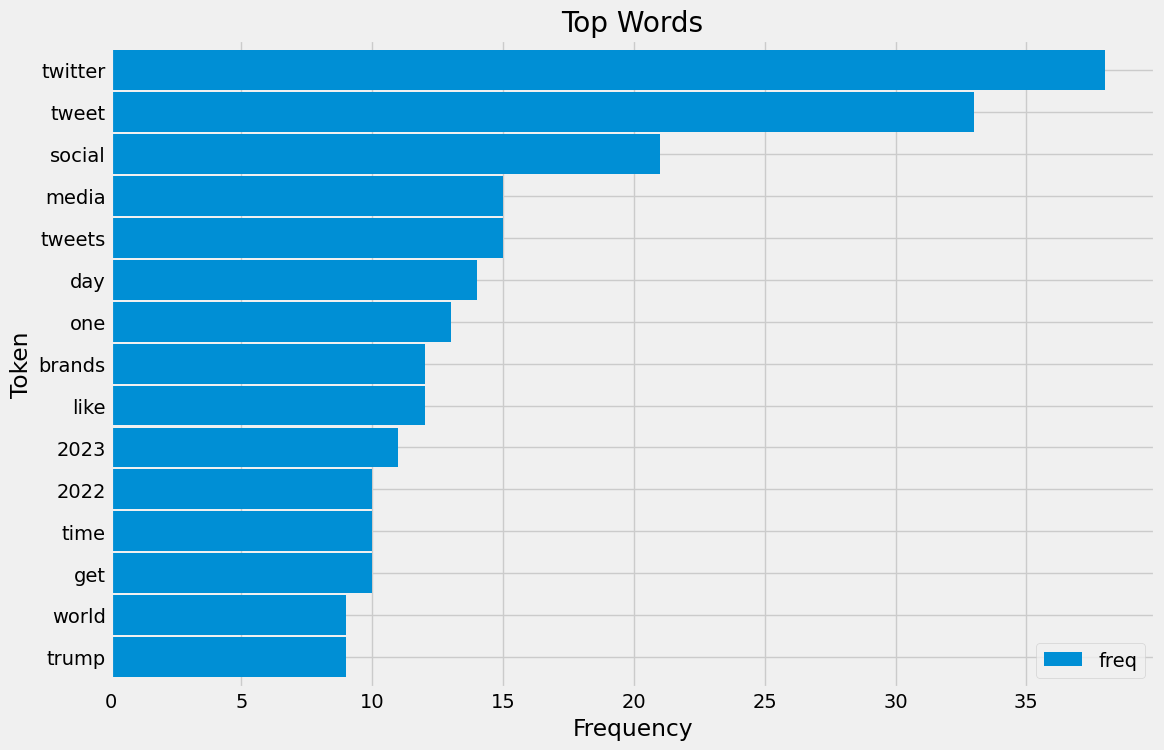

In [258]:
#Bar chart 

ax = freq_df.head(15).plot(kind='barh', width=0.95, figsize=(12,8),)
ax.invert_yaxis()
ax.set(xlabel='Frequency', ylabel='Token', title='Top Words')

## Sentiment Analysis Of Tweets

In [261]:
#!pip install textblob

from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tweet_df dataframe
df['Subjectivity'] = df['Titles'].apply(getSubjectivity)
df['Polarity'] = df['Titles'].apply(getPolarity)

#Now display data
df.head()

,Titles,length,tokenized_Titles,clean_tokens,cleantokens,processed_Titles,tokens,num_tokens,Subjectivity,Polarity
0,"MA'AM, I AM SORRY BUT WHAT?",27,"[MA, AM, I, AM, SORRY, BUT, WHAT]","[MA'AM, ,, SORRY, ?]","[MA'AM,, SORRY, WHAT?]",[sorry],[sorry],1,1.0,-0.50
1,ESPN CLEANUP GOING INTO EXTRA INNINGS,37,"[ESPN, CLEANUP, GOING, INTO, EXTRA, INNINGS]","[ESPN, CLEANUP, GOING, EXTRA, INNINGS]","[ESPN, CLEANUP, GOING, EXTRA, INNINGS]","[espn, cleanup, going, extra, innings]","[espn, cleanup, going, extra, innings]",5,0.1,0.00
2,"MRS. BETTY BOWERS ""YOU KNOW WHAT WILL ALWAYS B...",270,"[MRS, BETTY, BOWERS, YOU, KNOW, WHAT, WILL, AL...","[MRS., BETTY, BOWERS, ``, KNOW, ALWAYS, DESPIC...","[MRS., BETTY, BOWERS, ""YOU, KNOW, ALWAYS, DESP...","[mrs, betty, bowers, know, always, despicable,...","[mrs, betty, bowers, know, always, despicable,...",25,0.4,0.35
3,SEEMS LIKE WE ARE GIVING 1986 ANOTHER GO ⏳ (CR...,67,"[SEEMS, LIKE, WE, ARE, GIVING, ANOTHER, GO, CR...","[SEEMS, LIKE, GIVING, 1986, ANOTHER, GO, ⏳, (,...","[SEEMS, LIKE, GIVING, 1986, ANOTHER, GO, ⏳, (C...","[seems, like, giving, 1986, another, go, credit]","[seems, like, giving, 1986, another, go, credit]",7,0.0,0.00
4,I FIND IT A BIT DISCONCERTING THAT A COMPANY ...,156,"[I, FIND, IT, A, BIT, DISCONCERTING, THAT, A, ...","[FIND, BIT, DISCONCERTING, COMPANY, MAKES, HAI...","[FIND, BIT, DISCONCERTING, COMPANY, MAKES, HAI...","[find, bit, disconcerting, company, makes, hai...","[find, bit, disconcerting, company, makes, hai...",14,0.0,0.00


## Categorizing Diabetes REDDIT POSTS

In [264]:
#Group the range of Polarity to different categories
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"

# Apply the getInsight function to the "Polarity" column of the DataFrame
# and store the resulting sentiment insights in a new column named "Insight"   
df["Insight"] = df["Polarity"].apply(getInsight)

# Display the first 50 rows of the DataFrame with the newly added "Insight" column
df.head(20)

,Titles,length,tokenized_Titles,clean_tokens,cleantokens,processed_Titles,tokens,num_tokens,Subjectivity,Polarity,Insight
0,"MA'AM, I AM SORRY BUT WHAT?",27,"[MA, AM, I, AM, SORRY, BUT, WHAT]","[MA'AM, ,, SORRY, ?]","[MA'AM,, SORRY, WHAT?]",[sorry],[sorry],1,1.000000,-0.500000,Negative
1,ESPN CLEANUP GOING INTO EXTRA INNINGS,37,"[ESPN, CLEANUP, GOING, INTO, EXTRA, INNINGS]","[ESPN, CLEANUP, GOING, EXTRA, INNINGS]","[ESPN, CLEANUP, GOING, EXTRA, INNINGS]","[espn, cleanup, going, extra, innings]","[espn, cleanup, going, extra, innings]",5,0.100000,0.000000,Neutral
2,"MRS. BETTY BOWERS ""YOU KNOW WHAT WILL ALWAYS B...",270,"[MRS, BETTY, BOWERS, YOU, KNOW, WHAT, WILL, AL...","[MRS., BETTY, BOWERS, ``, KNOW, ALWAYS, DESPIC...","[MRS., BETTY, BOWERS, ""YOU, KNOW, ALWAYS, DESP...","[mrs, betty, bowers, know, always, despicable,...","[mrs, betty, bowers, know, always, despicable,...",25,0.400000,0.350000,Positive
3,SEEMS LIKE WE ARE GIVING 1986 ANOTHER GO ⏳ (CR...,67,"[SEEMS, LIKE, WE, ARE, GIVING, ANOTHER, GO, CR...","[SEEMS, LIKE, GIVING, 1986, ANOTHER, GO, ⏳, (,...","[SEEMS, LIKE, GIVING, 1986, ANOTHER, GO, ⏳, (C...","[seems, like, giving, 1986, another, go, credit]","[seems, like, giving, 1986, another, go, credit]",7,0.000000,0.000000,Neutral
4,I FIND IT A BIT DISCONCERTING THAT A COMPANY ...,156,"[I, FIND, IT, A, BIT, DISCONCERTING, THAT, A, ...","[FIND, BIT, DISCONCERTING, COMPANY, MAKES, HAI...","[FIND, BIT, DISCONCERTING, COMPANY, MAKES, HAI...","[find, bit, disconcerting, company, makes, hai...","[find, bit, disconcerting, company, makes, hai...",14,0.000000,0.000000,Neutral
5,I WASTE MY MOST OF THE TIME THINKING HOW MUCH ...,58,"[I, WASTE, MY, MOST, OF, THE, TIME, THINKING, ...","[WASTE, TIME, THINKING, MUCH, WASTE, TIME]","[WASTE, TIME, THINKING, MUCH, WASTE, TIME]","[waste, time, thinking, much, waste, time]","[waste, time, thinking, much, waste, time]",6,0.166667,0.033333,Positive
6,OUTCLAWED.,10,[OUTCLAWED],"[OUTCLAWED, .]",[OUTCLAWED.],[outclawed],[outclawed],1,0.000000,0.000000,Neutral
7,TWITTER'S WHITE-PEOPLE PROBLEM,30,"[TWITTER, S, WHITE-PEOPLE, PROBLEM]","[TWITTER, 'S, WHITE-PEOPLE, PROBLEM]","[TWITTER'S, WHITE-PEOPLE, PROBLEM]","[twitter, white, people, problem]","[twitter, white, people, problem]",4,0.000000,0.000000,Neutral
8,WHY IS ELON IS SO OBSESSED WITH THE LETTER X?,45,"[WHY, IS, ELON, IS, SO, OBSESSED, WITH, THE, L...","[ELON, OBSESSED, LETTER, X, ?]","[ELON, OBSESSED, LETTER, X?]","[elon, obsessed, letter, x]","[elon, obsessed, letter, x]",4,1.000000,-0.500000,Negative
9,OFF DOME,8,"[OFF, DOME]",[DOME],[DOME],[dome],[dome],1,0.000000,0.000000,Neutral


## Data Visualization

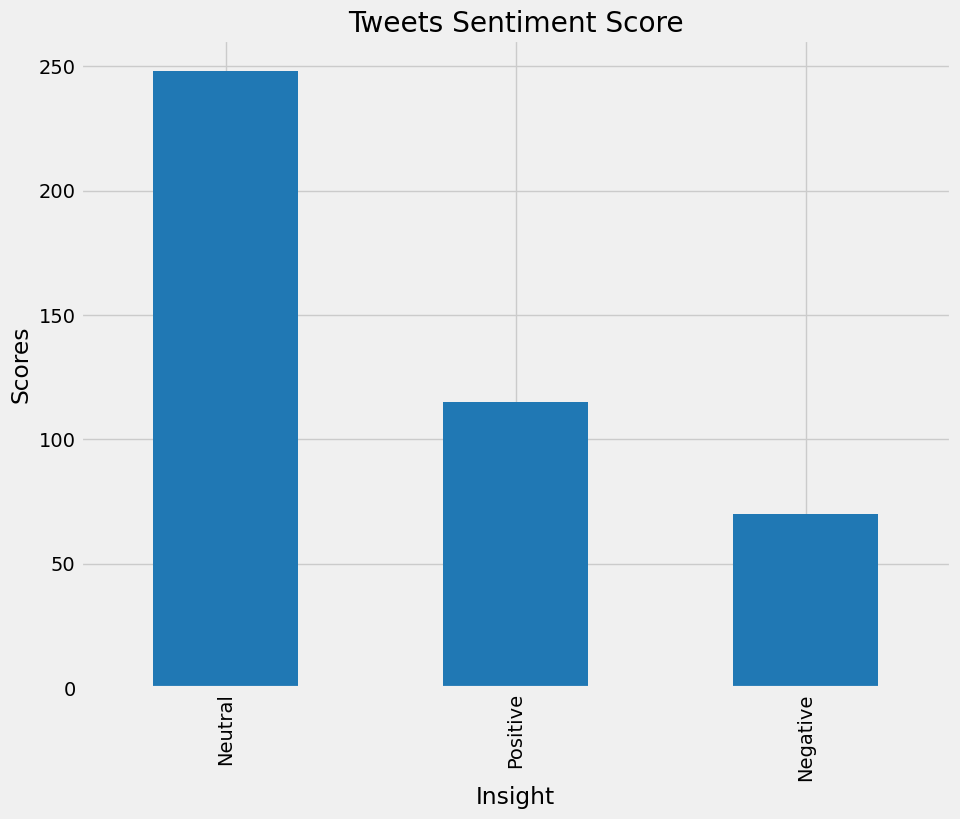

In [267]:
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Suppress warnings
warnings.filterwarnings("ignore")

# Set the plotting style
plt.style.use('fivethirtyeight')

#Plot the values count of sentiment
plt.title("Tweets Sentiment Score")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (10,8)
df["Insight"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()

## Exploring Sentiment Lexicon and Tokenizing of Dataset

In [270]:
# Install scikit-learn library
#!pip install scikit-learn
# Install NLTK library 
#!pip install nltk
import nltk
#nltk.download('opinion_lexicon')

# Import necessary modules from scikit-learn and NLTK libraries
from sklearn import preprocessing
import nltk

# Import the opinion lexicon corpus from NLTK
from nltk.corpus import opinion_lexicon
# Import the word_tokenize function from NLTK, which is used for tokenization
from nltk.tokenize import word_tokenize


# Print the total number of words in the opinion lexicon dataset
print('Total number of words in opinion lexicon', len(opinion_lexicon.words()))
# Print examples of positive words from the opinion lexicon dataset
print('Examples of positive words in opinion lexicon',
      opinion_lexicon.positive()[:10])
# Print examples of negative words from the opinion lexicon dataset
print('Examples of negative words in opinion lexicon',
      opinion_lexicon.negative()[:10])

Total number of words in opinion lexicon 6789
Examples of positive words in opinion lexicon ['a+', 'abound', 'abounds', 'abundance', 'abundant', 'accessable', 'accessible', 'acclaim', 'acclaimed', 'acclamation']
Examples of negative words in opinion lexicon ['2-faced', '2-faces', 'abnormal', 'abolish', 'abominable', 'abominably', 'abominate', 'abomination', 'abort', 'aborted']


## Constructing Sentiment Scoring Dictionary of Dataset

In [273]:
# Let's create a dictionary which we can use for scoring our review titles

df.rename(columns={"reviewTitles": "Titles"}, inplace=True)
pos_score = 1
neg_score = -1
word_dict = {}
 
# Adding the positive words to the dictionary
for word in opinion_lexicon.positive():
        word_dict[word] = pos_score
      
# Adding the negative words to the dictionary
for word in opinion_lexicon.negative():
        word_dict[word] = neg_score
    
#Printing a dictionary
print(word_dict)

{'a+': 1, 'abound': 1, 'abounds': 1, 'abundance': 1, 'abundant': 1, 'accessable': 1, 'accessible': 1, 'acclaim': 1, 'acclaimed': 1, 'acclamation': 1, 'accolade': 1, 'accolades': 1, 'accommodative': 1, 'accomodative': 1, 'accomplish': 1, 'accomplished': 1, 'accomplishment': 1, 'accomplishments': 1, 'accurate': 1, 'accurately': 1, 'achievable': 1, 'achievement': 1, 'achievements': 1, 'achievible': 1, 'acumen': 1, 'adaptable': 1, 'adaptive': 1, 'adequate': 1, 'adjustable': 1, 'admirable': 1, 'admirably': 1, 'admiration': 1, 'admire': 1, 'admirer': 1, 'admiring': 1, 'admiringly': 1, 'adorable': 1, 'adore': 1, 'adored': 1, 'adorer': 1, 'adoring': 1, 'adoringly': 1, 'adroit': 1, 'adroitly': 1, 'adulate': 1, 'adulation': 1, 'adulatory': 1, 'advanced': 1, 'advantage': 1, 'advantageous': 1, 'advantageously': 1, 'advantages': 1, 'adventuresome': 1, 'adventurous': 1, 'advocate': 1, 'advocated': 1, 'advocates': 1, 'affability': 1, 'affable': 1, 'affably': 1, 'affectation': 1, 'affection': 1, 'affe

## wordcloud theme in circle shape

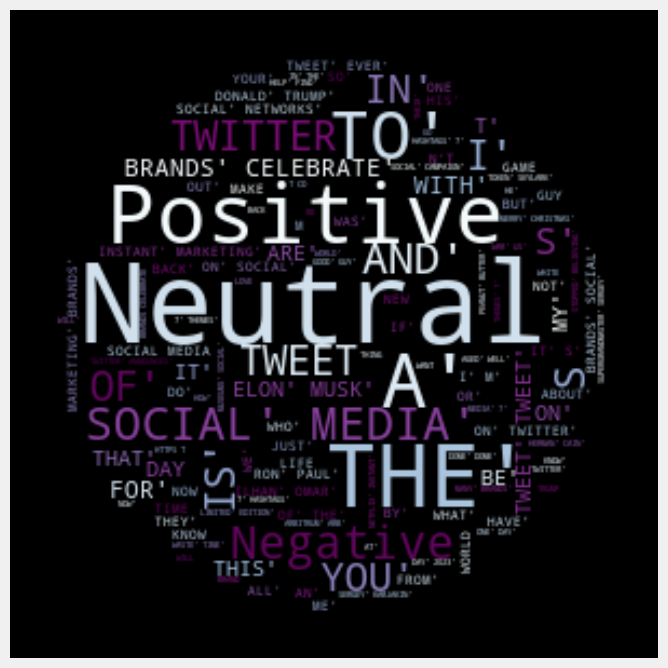

In [288]:
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Concatenate text values from all relevant columns
text = ' '.join(df.astype(str).values.flatten())

# Circle mask
x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

# Create WordCloud with a circle mask and provided parameters
wc = WordCloud(
    background_color="black",
    mask=mask,
    contour_width=2,
    contour_color="black",
    colormap="BuPu_r",
    width=800,
    height=500
).generate(text)

plt.figure(figsize=(8, 8))
plt.axis("off")
plt.imshow(wc, interpolation="bilinear", origin='upper')

plt.show()

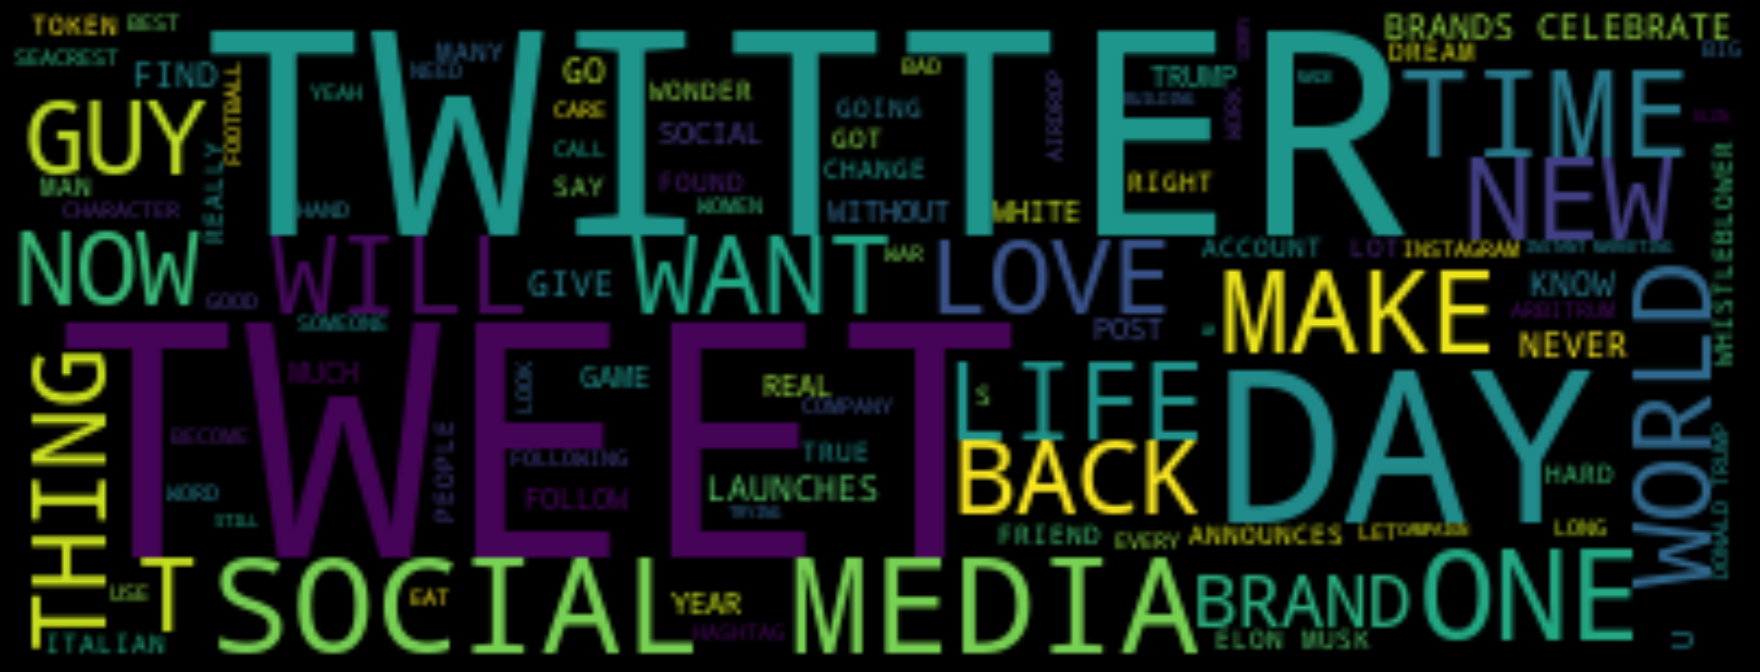

In [278]:
text = ' '.join( [twts for twts in df['Titles']] ) #To join all tweet
    # generate word cloud 
wordcloud = WordCloud(width=400, height = 150,
                      
                      max_words = 100,
                      stopwords = STOPWORDS,
                      background_color="black").generate(text)

  # Display the generated image:
plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");